**Chapter 21: Decision Trees: Multiple Possible Outcomes**

Suppose we want to create a categorical Decision Tree model that predicts what region a person is located based on other factors.

In [21]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

**Dummy Variables**: The following code is another way to create dummy variables without having to list individual variables (except your response). ONLY create dummy variables of your features (not response).

In [22]:
for col in df.columns:
    if col != 'region':
        if not pd.api.types.is_numeric_dtype(df[col]):
            df = pd.get_dummies(df, columns=[col], prefix=col, dtype=int)
      
df

age     bmi  children     region      charges  sex_female  sex_male  \
0      19  27.900         0  southwest  16884.92400           1         0   
1      18  33.770         1  southeast   1725.55230           0         1   
2      28  33.000         3  southeast   4449.46200           0         1   
3      33  22.705         0  northwest  21984.47061           0         1   
4      32  28.880         0  northwest   3866.85520           0         1   
...   ...     ...       ...        ...          ...         ...       ...   
1333   50  30.970         3  northwest  10600.54830           0         1   
1334   18  31.920         0  northeast   2205.98080           1         0   
1335   18  36.850         0  southeast   1629.83350           1         0   
1336   21  25.800         0  southwest   2007.94500           1         0   
1337   61  29.070         0  northwest  29141.36030           1         0   

      smoker_no  smoker_yes  
0             0           1  
1             1           0  
2             1           0  
3             1           0  
4             1           0  
...         ...         ...  
1333          1           0  
1334          1           0  
1335          1           0  
1336          1           0  
1337          0           1  

[1338 rows x 9 columns]

**X and y Matrices**

In [23]:
y = df.region # Label
X = df.drop(columns=['region']) # Features
X = X.select_dtypes(np.number)
X

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  
0              1  
1              0  
2              0  
3              0  
4              0  
...          ...  
1333           0  
1334           0  
1335           0  
1336           0  
1337           1  

[1338 rows x 8 columns]

**Training and Testing Datasets**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
744    50  26.410         0   8827.20990           0         1          1   
363    21  26.400         1   2597.77900           1         0          1   
10     25  26.220         0   2721.32080           0         1          1   
970    50  28.160         3  10702.64240           1         0          1   
634    51  39.700         1   9391.34600           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
715    60  28.900         0  12146.97100           0         1          1   
905    26  29.355         2   4564.19145           1         0          1   
1096   51  34.960         2  44641.19740           1         0          0   
235    40  22.220         2  19444.26580           1         0          0   
1061   57  27.940         1  11554.22360           0         1          1   

      smoker_yes  
744            0  
363            0  
10             0  
970            0  
634            0  
...          ...  
715            0  
905            0  
1096           1  
235            1  
1061           0  

[936 rows x 8 columns]

**NOTICE**: The number of rows for the first set as opposed to the number of rows for the second set!

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
    
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
    
# Predict the labels for test dataset
y_pred = clf.predict(X_test)

In [26]:
# View the predicted versus actual in a DataFrame

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df

Actual  Predicted
559   northwest  northwest
1087  northwest  northwest
1020  southwest  northwest
460   southeast  northwest
802   southwest  southwest
...         ...        ...
323   northeast  southeast
1268  southwest  southeast
134   northeast  southeast
1274  southeast  southwest
876   southwest  southwest

[402 rows x 2 columns]

**Confusion Matrix**: Make sure to list your labels in alphabetical order. This shows often the model predicts a region when the person is actually from another region, or how often the model predicts correctly. Look at the numbers below: does it seem like the model is accurately predicting a person's region often? 

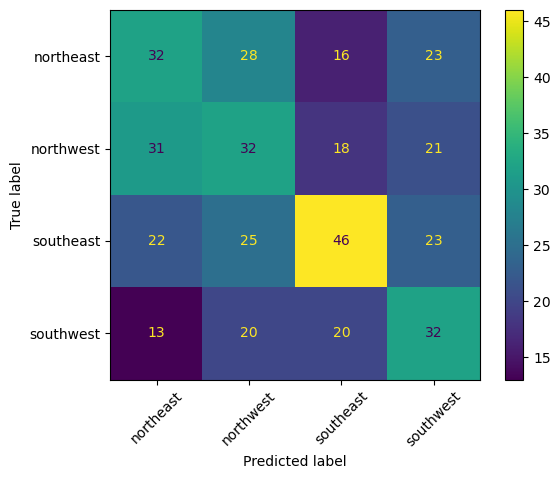

region
southeast    116
northwest    102
northeast     99
southwest     85
Name: count, dtype: int64


In [27]:
from sklearn import metrics
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['northeast', 'northwest', 'southeast', 'southwest']) #ALPHABETICAL ORDER
cm_display.plot(values_format='d')
plt.xticks(rotation=45)
plt.show()

print(y_test.value_counts()) #USE THIS TO VERIFY YOUR PLOT

In [28]:
clf.score(X_test, y_test)

0.35323383084577115

*Not a particularly high score. What does this mean?*

In [29]:
y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)

report_dict = metrics.classification_report(y_test_dummies, y_pred_dummies, target_names=['northeast', 'northwest', 'southeast', 'southwest'], output_dict=True)

from sklearn.metrics import classification_report

df_report = pd.DataFrame(report_dict)
df_report

northeast   northwest   southeast  southwest   micro avg  \
precision   0.326531    0.304762    0.460000   0.323232    0.353234   
recall      0.323232    0.313725    0.396552   0.376471    0.353234   
f1-score    0.324873    0.309179    0.425926   0.347826    0.353234   
support    99.000000  102.000000  116.000000  85.000000  402.000000   

            macro avg  weighted avg  samples avg  
precision    0.353631      0.358823     0.353234  
recall       0.352495      0.353234     0.353234  
f1-score     0.351951      0.354904     0.353234  
support    402.000000    402.000000   402.000000

*Look back at your book. What do these values say about your model? Is it a good model?*

**IF YOU RUN INTO GRAPHVIZ ISSUES, HERE IS WHAT WORKED FOR ME**

In [30]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [31]:
dot_data = StringIO()
export_graphviz(clf, # This is the model we trained previously
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters=True, 
                feature_names = X.columns,
                class_names = ['northeast', 'northwest', 'southeast', 'southwest'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [32]:
graph.write_png('region.png',f='png',prog="dot")

InvocationException: GraphViz's executables not found

In [ ]:
Image(graph.create_png())     # This is like plt.show()

**scikit-learn's built-in tree generator with Matplotlib**

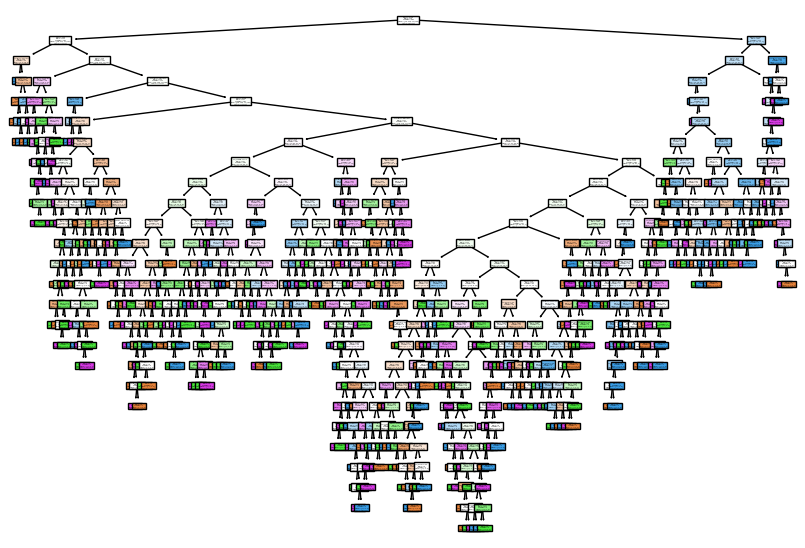

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
    
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,7), dpi=100)
    
fn = ['age', 'bmi', 'charges', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes'] #Notice: These variables come from the clf above!
cn = ['northeast', 'northwest', 'southeast', 'southwest']
    
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True);